In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u

import pandas
pandas.set_option('display.max_rows', 1000)

from lsst.rsp import get_tap_service, retrieve_query

In [60]:
%matplotlib inline

# Set up some plotting defaults:

params = {'axes.labelsize': 24,
          'font.size': 20,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [10, 8],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

In [3]:
service = get_tap_service()

In [4]:
ra_pick = 62.1479031
dec_pick = -35.799138

Pick one of the known RRab stars from the DP0.2 data:

In [5]:
results = service.search("SELECT coord_ra, coord_dec, objectId, g_psfFlux, r_psfFlux, i_psfFlux, "\
                         "detect_isPrimary, g_extendedness, r_extendedness, i_extendedness "\
                         "FROM dp02_dc2_catalogs.Object "\
                         "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), CIRCLE('ICRS',"+str(ra_pick)+", "+str(dec_pick)+", 0.001)) = 1 "\
                         "AND detect_isPrimary>0.5", maxrec=100000)
objs = results.to_table()

objs['gPSFMag'] = (objs['g_psfFlux'].value*u.nJy).to(u.ABmag)
objs['rPSFMag'] = (objs['r_psfFlux'].value*u.nJy).to(u.ABmag)
objs['iPSFMag'] = (objs['i_psfFlux'].value*u.nJy).to(u.ABmag)


In [6]:
objs

coord_ra,coord_dec,objectId,g_psfFlux,r_psfFlux,i_psfFlux,detect_isPrimary,g_extendedness,r_extendedness,i_extendedness,gPSFMag,rPSFMag,iPSFMag
deg,deg,,nanojansky,nanojansky,nanojansky,,,,,mag(AB),mag(AB),mag(AB)
float64,float64,int64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64
62.1479018,-35.7991382,1651589610221899038,148048.9327607,185964.3848651,173109.3517536,True,0.0,0.0,0.0,18.473986797397433,18.226425555283118,18.304198674833764


In [7]:
sel_objid = objs[0]['objectId']

In [8]:
# Define the query
query = "SELECT src.band, src.ccdVisitId, src.coord_ra, src.coord_dec, "\
        "src.objectId, src.psfFlux, src.psfFluxErr, "\
        "visinfo.ccdVisitId, visinfo.band, visinfo.expMidptMJD, visinfo.zeroPoint "\
        "FROM dp02_dc2_catalogs.ForcedSource as src "\
        "JOIN dp02_dc2_catalogs.CcdVisit as visinfo "\
        "ON visinfo.ccdVisitId = src.ccdVisitId "\
        "WHERE src.objectId = "+str(sel_objid)+" "

'''
obj.objectId, obj.ra, obj.dec, obj.mag_g, obj.mag_r, "\
        "obj.mag_i, obj.mag_g_cModel, obj.mag_r_cModel, obj.mag_i_cModel, "\
        "obj.psFlux_g, obj.psFlux_r, obj.psFlux_i, obj.cModelFlux_g, "\
        "obj.cModelFlux_r, obj.cModelFlux_i, obj.tract, obj.patch, "\
        "obj.extendedness, obj.good, obj.clean, "\
        "truth.mag_r as truth_mag_r, truth.match_objectId, "\
        "truth.flux_g, truth.flux_r, truth.flux_i, truth.truth_type,  "\
        "truth.match_sep, truth.is_variable "\
        "FROM dp01_dc2_catalogs.object as obj "\
        "JOIN dp01_dc2_catalogs.truth_match as truth "\
        "ON truth.match_objectId = obj.objectId "\
        "WHERE CONTAINS(POINT('ICRS', obj.ra, obj.dec), "\
        "CIRCLE('ICRS', 62.0, -37.0, 0.10)) = 1 "\
        "AND truth.match_objectid >= 0 "\
        "AND truth.is_good_match = 1"
print(query)
'''

'\nobj.objectId, obj.ra, obj.dec, obj.mag_g, obj.mag_r, "        "obj.mag_i, obj.mag_g_cModel, obj.mag_r_cModel, obj.mag_i_cModel, "        "obj.psFlux_g, obj.psFlux_r, obj.psFlux_i, obj.cModelFlux_g, "        "obj.cModelFlux_r, obj.cModelFlux_i, obj.tract, obj.patch, "        "obj.extendedness, obj.good, obj.clean, "        "truth.mag_r as truth_mag_r, truth.match_objectId, "        "truth.flux_g, truth.flux_r, truth.flux_i, truth.truth_type,  "        "truth.match_sep, truth.is_variable "        "FROM dp01_dc2_catalogs.object as obj "        "JOIN dp01_dc2_catalogs.truth_match as truth "        "ON truth.match_objectId = obj.objectId "        "WHERE CONTAINS(POINT(\'ICRS\', obj.ra, obj.dec), "        "CIRCLE(\'ICRS\', 62.0, -37.0, 0.10)) = 1 "        "AND truth.match_objectid >= 0 "        "AND truth.is_good_match = 1"\nprint(query)\n'

In [9]:
results = service.search(query)
srcs = results.to_table()

srcs['psfMag'] = (srcs['psfFlux'].value*u.nJy).to(u.ABmag)

In [10]:
srcs

band,ccdVisitId,coord_ra,coord_dec,objectId,psfFlux,psfFluxErr,ccdVisitId2,band2,expMidptMJD,zeroPoint,psfMag
,,deg,deg,,nanojansky,nanojansky,,,,,mag(AB)
object,int64,float64,float64,int64,float64,float64,int64,object,float64,float32,float64
r,414861046,62.1479018,-35.7991382,1651589610221899038,131851.1538881,386.7600372,414861046,r,60166.3331702,32.1795,18.599790162874285
r,718818112,62.1479018,-35.7991382,1651589610221899038,170332.2843202,434.7878455,718818112,r,60643.0669522,32.178,18.321757573086902
r,943324129,62.1479018,-35.7991382,1651589610221899038,146328.0393507,421.0905817,943324129,r,60961.2457292,32.1715,18.48668111618875
r,943325140,62.1479018,-35.7991382,1651589610221899038,147724.9138055,424.9277484,943325140,r,60961.2461782,32.1696,18.476365636875673
r,414892047,62.1479018,-35.7991382,1651589610221899038,129683.0533897,381.2756228,414892047,r,60166.3471312,32.1781,18.61779193142047
r,721835057,62.1479018,-35.7991382,1651589610221899038,176142.8397585,447.0436574,721835057,r,60647.1295272,32.1727,18.285337515702665
r,753606017,62.1479018,-35.7991382,1651589610221899038,141989.9975897,417.7439037,753606017,r,60693.1292282,32.1784,18.51935562046138
r,718857011,62.1479018,-35.7991382,1651589610221899038,165033.4966435,424.895895,718857011,r,60643.0845602,32.1775,18.356069746571293


In [11]:
picku = (srcs['band'] == 'u')
pickg = (srcs['band'] == 'g')
pickr = (srcs['band'] == 'r')
picki = (srcs['band'] == 'i')
pickz = (srcs['band'] == 'z')
picky = (srcs['band'] == 'y')


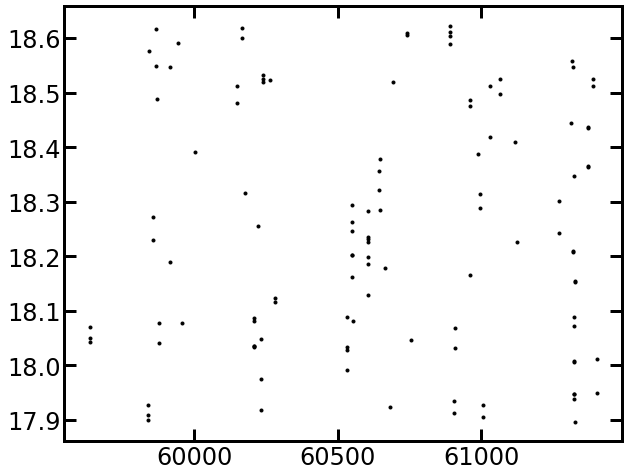

In [12]:
plt.plot(srcs[pickr]['expMidptMJD'], srcs[pickr]['psfMag'], 'k.')
plt.show()

In [13]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.time import Time
from astropy.table import Table
from astropy.io import fits
from astropy.timeseries import LombScargle

import time

In [36]:
# Make arrays with units attached:

umjd_days = np.array(srcs[picku]['expMidptMJD']) * u.day
umags = np.array(srcs[picku]['psfMag']) #* u.mag
gmjd_days = np.array(srcs[pickg]['expMidptMJD']) * u.day
gmags = np.array(srcs[pickg]['psfMag']) #* u.mag
rmjd_days = np.array(srcs[pickr]['expMidptMJD']) * u.day
rmags = np.array(srcs[pickr]['psfMag']) #* u.mag
imjd_days = np.array(srcs[picki]['expMidptMJD']) * u.day
imags = np.array(srcs[picki]['psfMag']) #* u.mag
zmjd_days = np.array(srcs[pickz]['expMidptMJD']) * u.day
zmags = np.array(srcs[pickz]['psfMag']) #* u.mag
ymjd_days = np.array(srcs[picky]['expMidptMJD']) * u.day
ymags = np.array(srcs[picky]['psfMag']) #* u.mag

# The Lomb-Scargle periodogram returns the power at different frequencies.

# Because we know this is an RR Lyrae star, its period must be between
# ~0.2-0.9 days. We will use the min/max frequency settings to limit our
# period search to 0.05-1.25 days.

min_freq_search = 1.0 / (1.05 * u.day)
max_freq_search = 1.0 / (0.05 * u.day)

# frequency, power = LombScargle(mjd_days, mags).autopower()
ufrequency, upower = LombScargle(umjd_days, umags).autopower(minimum_frequency=min_freq_search,
                                                             maximum_frequency=max_freq_search)
gfrequency, gpower = LombScargle(gmjd_days, gmags).autopower(minimum_frequency=min_freq_search,
                                                             maximum_frequency=max_freq_search)
rfrequency, rpower = LombScargle(rmjd_days, rmags).autopower(minimum_frequency=min_freq_search,
                                                             maximum_frequency=max_freq_search)
ifrequency, ipower = LombScargle(imjd_days, imags).autopower(minimum_frequency=min_freq_search,
                                                             maximum_frequency=max_freq_search)
zfrequency, zpower = LombScargle(zmjd_days, zmags).autopower(minimum_frequency=min_freq_search,
                                                             maximum_frequency=max_freq_search)
yfrequency, ypower = LombScargle(ymjd_days, ymags).autopower(minimum_frequency=min_freq_search,
                                                             maximum_frequency=max_freq_search)


In [37]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']

In [38]:
peak_freqs = {}
all_peak_freqs = []

for band in bands:
    peakStr = "peakbin = np.argmax("+band+"power)"
    exec(peakStr)
    peak_freqs[band+"_peakbin"] = peakbin
    freqStr = "peakfreq = "+band+"frequency[peakbin]"
    exec(freqStr)
    peak_freqs[band+"_peakfreq"] = peakfreq
    all_peak_freqs.append(peakfreq.value)
    # print(1/peakfreq)


# Select power>0.4 and period (or 1/frequency) within 0.1 days of 0.5.
#g_select_peak = np.argmax(gpower)
#r_select_peak = np.argmax(rpower)
#i_select_peak = np.argmax(ipower)

#print(1 / gfrequency[g_select_peak], 1 / rfrequency[r_select_peak], 1 / ifrequency[i_select_peak])

all_peak_freqs = np.array(all_peak_freqs)
mean_peak_freq = np.mean(all_peak_freqs)

print(mean_peak_freq, 1/mean_peak_freq)

1.962589383860051 0.5095309330743371


In [39]:
print(peak_freqs)

{'u_peakbin': 9077, 'u_peakfreq': <Quantity 1.96261051 1 / d>, 'g_peakbin': 8045, 'g_peakfreq': <Quantity 1.96261062 1 / d>, 'r_peakbin': 8941, 'r_peakfreq': <Quantity 1.96261288 1 / d>, 'i_peakbin': 7762, 'i_peakfreq': <Quantity 1.96252393 1 / d>, 'z_peakbin': 8981, 'z_peakfreq': <Quantity 1.96255106 1 / d>, 'y_peakbin': 8850, 'y_peakfreq': <Quantity 1.9626273 1 / d>}


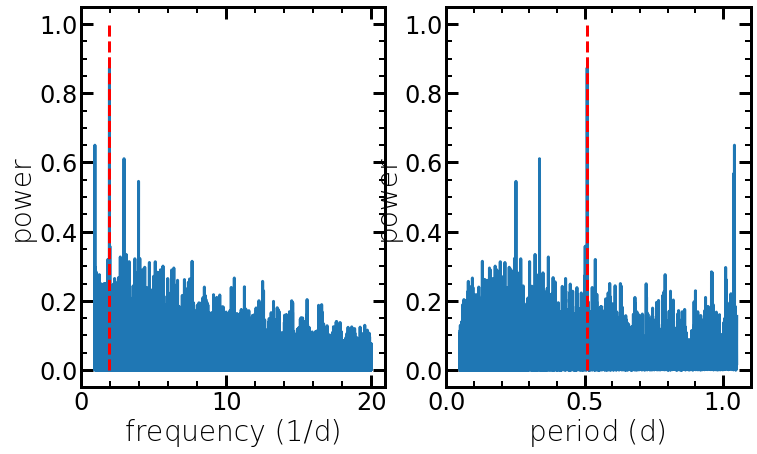

In [40]:
# Plot the frequency spectrum:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

plt.sca(ax[0])  # set the first axis as current

plt.plot(rfrequency, rpower)
plt.vlines(mean_peak_freq, 0, 1, linestyle='--', color='Red')
plt.minorticks_on()
plt.xlabel('frequency (1/d)')
plt.ylabel('power')

plt.sca(ax[1])  # set the second axis as current
plt.plot(1 / rfrequency, rpower)
plt.vlines(1/mean_peak_freq, 0, 1, linestyle='--', color='Red')
plt.minorticks_on()
#plt.xlim(0.25, 0.75)
plt.xlabel('period (d)')
plt.ylabel('power')
plt.show()

In [41]:
# Select power>0.4 and period (or 1/frequency) within 0.1 days of 0.5.
# select_peak = (power > 0.7) & (np.abs(0.5 - (1 / frequency.value)) < 0.1)

# print(1 / frequency[select_peak])

In [42]:
# Since there are multiple points satisfying the condition, we will take the
#   mean of their periods as the "best" period.

#best_period = np.mean(1 / frequency[select_peak])
#print(best_period)

best_period = 1/mean_peak_freq

#best_period = 1 / frequency[select_peak][4]
#print(best_period)
# 0.3794395688883673 d r-band

In [43]:
# Number of elapsed periods since the first measurement:
umjd_norm = (umjd_days.value - np.min(umjd_days.value)) / best_period
gmjd_norm = (gmjd_days.value - np.min(gmjd_days.value)) / best_period
rmjd_norm = (rmjd_days.value - np.min(rmjd_days.value)) / best_period
imjd_norm = (imjd_days.value - np.min(imjd_days.value)) / best_period
zmjd_norm = (zmjd_days.value - np.min(zmjd_days.value)) / best_period
ymjd_norm = (ymjd_days.value - np.min(ymjd_days.value)) / best_period

# Calculate phase by using the modulus function:
uphase = np.mod(umjd_norm, 1.0)
gphase = np.mod(gmjd_norm, 1.0)
rphase = np.mod(rmjd_norm, 1.0)
iphase = np.mod(imjd_norm, 1.0)
zphase = np.mod(zmjd_norm, 1.0)
yphase = np.mod(ymjd_norm, 1.0)

In [62]:
from descolors import BAND_COLORS
for name, color in BAND_COLORS.items():
    print("%s : %s"%(name,color))

u : #56b4e9
g : #008060
r : #ff4000
i : #850000
z : #6600cc
Y : #000000


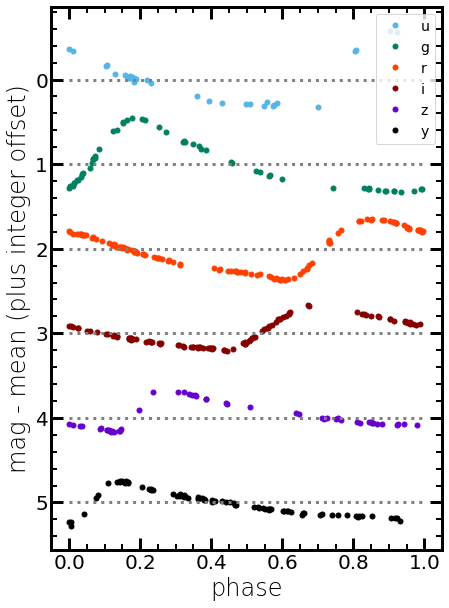

In [61]:
fig = plt.figure(figsize=(7, 10))     # create a matplotlib.pyplot figure

#plt.plot(uphase, umags, '.', ms=10, color=BAND_COLORS['u'], label='u')
#plt.plot(gphase, gmags, '.', ms=10, color=BAND_COLORS['g'], label='g')
#plt.plot(rphase, rmags, '.', ms=10, color=BAND_COLORS['r'], label='r')
#plt.plot(iphase, imags, '.', ms=10, color=BAND_COLORS['i'], label='i')
#plt.plot(zphase, zmags, '.', ms=10, color=BAND_COLORS['z'], label='z')
#plt.plot(yphase, ymags, '.', ms=10, color=BAND_COLORS['Y'], label='y')

plt.plot(uphase, umags-np.mean(umags), '.', ms=10, color=BAND_COLORS['u'], label='u')
plt.hlines(0, 0, 1, linestyle=':', color='Gray')
plt.plot(gphase, gmags-np.mean(gmags)+1, '.', ms=10, color=BAND_COLORS['g'], label='g')
plt.hlines(1, 0, 1, linestyle=':', color='Gray')
plt.plot(rphase, rmags-np.mean(rmags)+2, '.', ms=10, color=BAND_COLORS['r'], label='r')
plt.hlines(2, 0, 1, linestyle=':', color='Gray')
plt.plot(iphase, imags-np.mean(imags)+3, '.', ms=10, color=BAND_COLORS['i'], label='i')
plt.hlines(3, 0, 1, linestyle=':', color='Gray')
plt.plot(zphase, zmags-np.mean(zmags)+4, '.', ms=10, color=BAND_COLORS['z'], label='z')
plt.hlines(4, 0, 1, linestyle=':', color='Gray')
plt.plot(yphase, ymags-np.mean(ymags)+5, '.', ms=10, color=BAND_COLORS['Y'], label='y')
plt.hlines(5, 0, 1, linestyle=':', color='Gray')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('phase')
plt.ylabel('mag - mean (plus integer offset)')
plt.minorticks_on()
plt.show()

In [ ]:
results = service.search("SELECT band, ccdVisitId, coord_ra, coord_dec, objectId, psfFlux, psfFluxErr "\
                         "FROM dp02_dc2_catalogs.ForcedSource "\
                         "WHERE objectId = "+str(sel_objid)+" ")
srcs = results.to_table()

srcs['psfMag'] = (srcs['psfFlux'].value*u.nJy).to(u.ABmag)

In [ ]:
ccd_visit_info = service.search("SELECT * "\
                                "FROM dp02_dc2_catalogs.ccdVisitInfo "\
                                "WHERE objectId = "+str(sel_objid)+" ")
